In [1]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

# Add paths to your modules
sys.path.append('./OasisModel')
sys.path.append('./WeightedIntegratedGradients')
sys.path.append('./IntegratedGradients')
sys.path.append('./VisualizationLibrary')

from oasis_model_utils import load_oasis_model, load_labels_vocabulary, make_predictions_and_gradients, top_label_id_and_score, load_image
from integrated_gradients import integrated_gradients, random_baseline_integrated_gradients
from weighted_integrated_gradients import weighted_integrated_gradients, random_baseline_weighted_integrated_gradients, sqrt_weighting_function, reciprocal_weighting_function, linear_late_weighting_function, linear_early_weighting_function, quadratic_early_weighting_function, quadratic_late_weighting_function, logarithmic_weighting_function, exponential_weighting_function, beta22_weighting_function
from visualization_lib import Visualize, show_pil_image, pil_image


In [2]:
MODEL_PATH = './OasisModel/best_oasis_model.pth'

# Load the OASIS model
model, label_names, device = load_oasis_model(MODEL_PATH)

# Load the Labels vocabulary
labels = load_labels_vocabulary(label_names)

# Make the predictions_and_gradients function
oasis_predictions_and_gradients = make_predictions_and_gradients(model, device)

print(f"Model loaded successfully!")
print(f"Classes: {labels}")


Model loaded successfully!
Classes: ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']


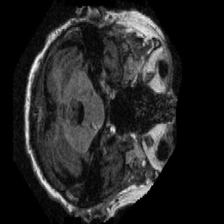

In [3]:
# Load a sample MRI image
img_path = 'OasisImages/Mild Dementia/OAS1_0028_MR1_mpr-1_100.jpg'
img = load_image(img_path)

# Resize image to match model input size (224x224)
from PIL import Image
img_pil = Image.fromarray(img.astype(np.uint8))
img_resized = img_pil.resize((224, 224), Image.LANCZOS)
img = np.array(img_resized)

# Display the image
show_pil_image(pil_image(img))


Top label: Mild Dementia, score: 0.972060
Gradients


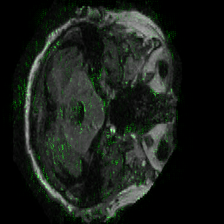

Integrated Gradients


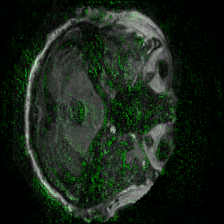

Weighted Integrated Gradients (sqrt weighting)


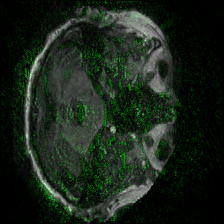

Weighted Integrated Gradients (reciprocal weighting)


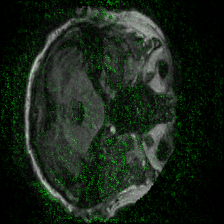

Weighted Integrated Gradients (linear late weighting)


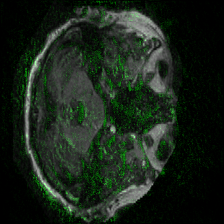

Weighted Integrated Gradients (linear early weighting)


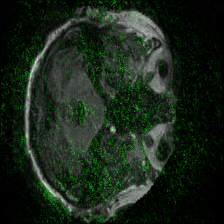

Weighted Integrated Gradients (quadratic early weighting)


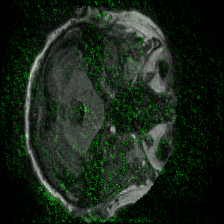

Weighted Integrated Gradients (quadratic late weighting)


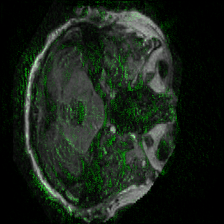

Weighted Integrated Gradients (logarithmic weighting)


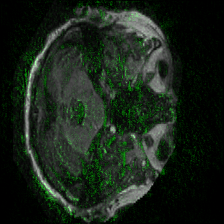

Weighted Integrated Gradients (exponential weighting)


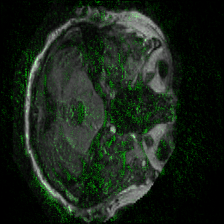

Weighted Integrated Gradients (beta22 weighting)


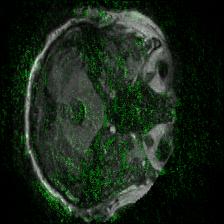

In [4]:
# Determine top label and score
top_label_id, score = top_label_id_and_score(img, oasis_predictions_and_gradients)
print("Top label: %s, score: %f" % (labels[top_label_id], score))

# Compute attributions based on just the gradients
_, gradients = oasis_predictions_and_gradients([img], top_label_id)

print('Gradients')
show_pil_image(pil_image(Visualize(
    gradients[0], img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True)))

# Compute attributions based on the integrated gradients method
attributions = random_baseline_integrated_gradients(
    img,
    top_label_id,
    oasis_predictions_and_gradients,
    steps=50,
    num_random_trials=10)

print('Integrated Gradients')
show_pil_image(pil_image(Visualize(
    attributions, img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True)))

# Weighted Integrated Gradients
attributions_weighted_sqrt = random_baseline_weighted_integrated_gradients(
    img,
    top_label_id,
    oasis_predictions_and_gradients,
    steps=50,
    num_random_trials=10,
    weighting_function=sqrt_weighting_function
)

print('Weighted Integrated Gradients (sqrt weighting)')
show_pil_image(pil_image(Visualize(
    attributions_weighted_sqrt, img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True)))

attributions_weighted_reciprocal = random_baseline_weighted_integrated_gradients(
    img,
    top_label_id,
    oasis_predictions_and_gradients,
    steps=50,
    num_random_trials=10,
    weighting_function=reciprocal_weighting_function
)

print('Weighted Integrated Gradients (reciprocal weighting)')
show_pil_image(pil_image(Visualize(
    attributions_weighted_reciprocal, img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True)))

attributions_weighted_linear_late = random_baseline_weighted_integrated_gradients(
    img,
    top_label_id,
    oasis_predictions_and_gradients,
    steps=50,
    num_random_trials=10,
    weighting_function=linear_late_weighting_function
)

print('Weighted Integrated Gradients (linear late weighting)')
show_pil_image(pil_image(Visualize(
    attributions_weighted_linear_late, img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True)))

attributions_weighted_linear_early = random_baseline_weighted_integrated_gradients(
    img,
    top_label_id,
    oasis_predictions_and_gradients,
    steps=50,
    num_random_trials=10,
    weighting_function=linear_early_weighting_function
)

print('Weighted Integrated Gradients (linear early weighting)')
show_pil_image(pil_image(Visualize(
    attributions_weighted_linear_early, img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True)))

attributions_weighted_quadratic_early = random_baseline_weighted_integrated_gradients(
    img,
    top_label_id,
    oasis_predictions_and_gradients,
    steps=50,
    num_random_trials=10,
    weighting_function=quadratic_early_weighting_function
)

print('Weighted Integrated Gradients (quadratic early weighting)')
show_pil_image(pil_image(Visualize(
    attributions_weighted_quadratic_early, img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True)))

attributions_weighted_quadratic_late = random_baseline_weighted_integrated_gradients(
    img,
    top_label_id,
    oasis_predictions_and_gradients,
    steps=50,
    num_random_trials=10,
    weighting_function=quadratic_late_weighting_function
)

print('Weighted Integrated Gradients (quadratic late weighting)')
show_pil_image(pil_image(Visualize(
    attributions_weighted_quadratic_late, img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True)))

attributions_weighted_logarithmic = random_baseline_weighted_integrated_gradients(
    img,
    top_label_id,
    oasis_predictions_and_gradients,
    steps=50,
    num_random_trials=10,
    weighting_function=logarithmic_weighting_function
)

print('Weighted Integrated Gradients (logarithmic weighting)')
show_pil_image(pil_image(Visualize(
    attributions_weighted_logarithmic, img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True)))

attributions_weighted_exponential = random_baseline_weighted_integrated_gradients(
    img,
    top_label_id,
    oasis_predictions_and_gradients,
    steps=50,
    num_random_trials=10,
    weighting_function=exponential_weighting_function
)

print('Weighted Integrated Gradients (exponential weighting)')
show_pil_image(pil_image(Visualize(
    attributions_weighted_exponential, img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True)))

attributions_weighted_beta22 = random_baseline_weighted_integrated_gradients(
    img,
    top_label_id,
    oasis_predictions_and_gradients,
    steps=50,
    num_random_trials=10,
    weighting_function=beta22_weighting_function
)

print('Weighted Integrated Gradients (beta22 weighting)')
show_pil_image(pil_image(Visualize(
    attributions_weighted_beta22, img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True)))


clipping


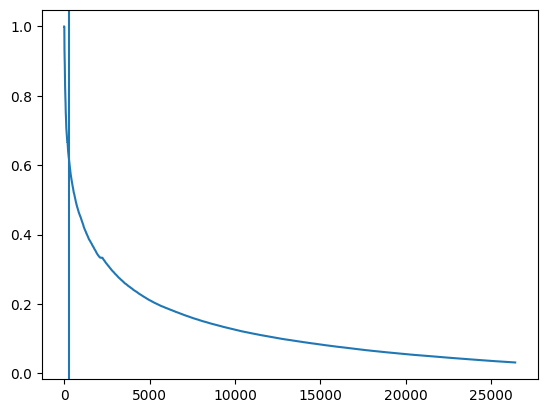

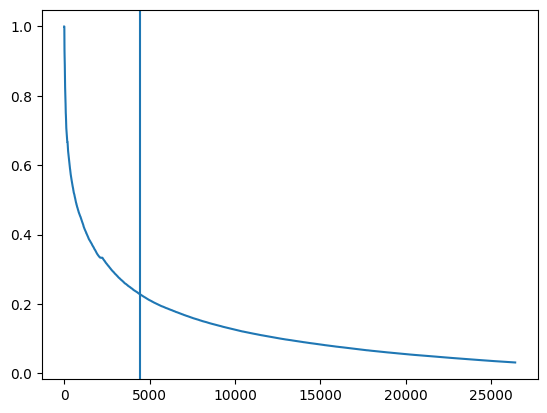

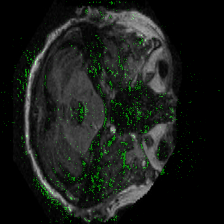

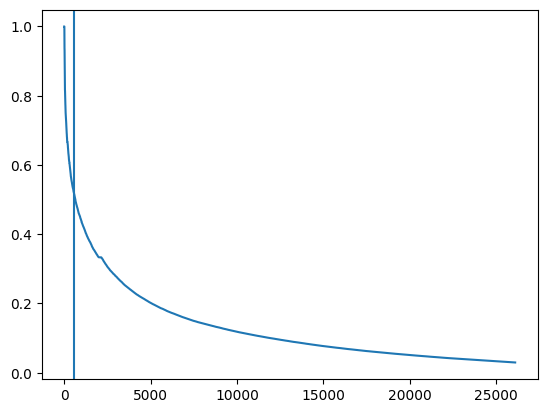

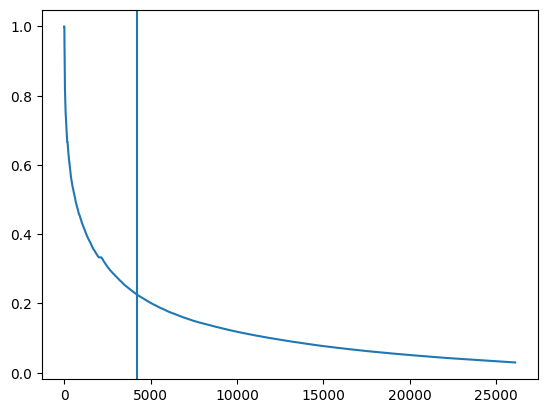

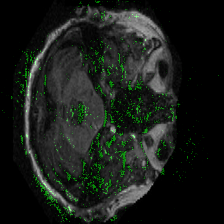

In [5]:
print("clipping")

show_pil_image(pil_image(Visualize(
    attributions, img,
    clip_above_percentile=95,
    clip_below_percentile=58,
    overlay=True,
    plot_distribution=True
)))

show_pil_image(pil_image(Visualize(
    attributions_weighted_exponential, img,
    clip_above_percentile=90,
    clip_below_percentile=58,
    overlay=True,
    plot_distribution=True
)))

Clipping + Morphological cleanup


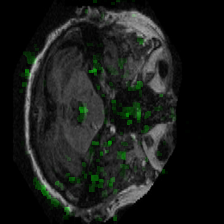

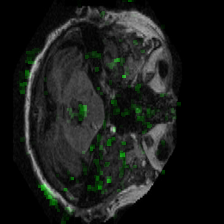

In [6]:
# Morphological cleanup
print('Clipping + Morphological cleanup')

show_pil_image(pil_image(Visualize(
    attributions, img,
    clip_above_percentile=95,
    clip_below_percentile=58,
    morphological_cleanup=True,
    overlay=True)))

show_pil_image(pil_image(Visualize(
    attributions_weighted_sqrt, img,
    clip_above_percentile=95,
    clip_below_percentile=58,
    morphological_cleanup=True,
    overlay=True
)))

Outlines


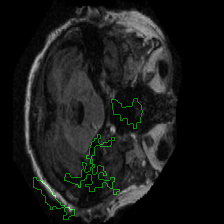

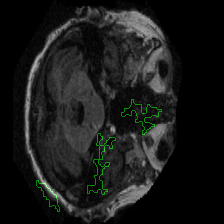

In [7]:
# Outlines
print('Outlines')

show_pil_image(pil_image(Visualize(
    attributions, img,
    clip_above_percentile=95,
    clip_below_percentile=58,
    morphological_cleanup=True,
    outlines=True,
    overlay=True)))

show_pil_image(pil_image(Visualize(
    attributions_weighted_sqrt, img,
    clip_above_percentile=95,
    clip_below_percentile=58,
    morphological_cleanup=True,
    outlines=True,
    overlay=True
)))

# Example images


Processing Image 1/1: OasisImages/Moderate Dementia/OAS1_0351_MR1_mpr-4_154.jpg
Top label: Moderate Dementia, score: 0.9940

Original Image:


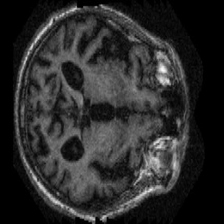


Exponential:


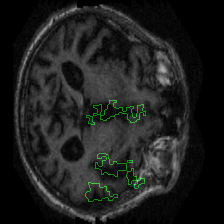

In [56]:
images_paths = [
'OasisImages/Moderate Dementia/OAS1_0351_MR1_mpr-4_154.jpg'
]

weighting_functions = {
        #'Normal IG': None,
        #'Square Root': sqrt_weighting_function,
        #'Reciprocal': reciprocal_weighting_function,
        #'Linear Late': linear_late_weighting_function,
        #'Linear Early': linear_early_weighting_function,
        #'Quadratic Early': quadratic_early_weighting_function,
        #'Quadratic Late': quadratic_late_weighting_function,
        'Exponential': exponential_weighting_function,
        #'Beta(2,2)': beta22_weighting_function
    }

for i, img_path in enumerate(images_paths):
    print(f"\n{'='*60}")
    print(f"Processing Image {i+1}/{len(images_paths)}: {img_path}")
    print(f"{'='*60}")

    img = load_image(img_path)
    img_pil = Image.fromarray(img.astype(np.uint8))
    img_resized = img_pil.resize((224, 224), Image.LANCZOS)
    img = np.array(img_resized)

    top_label_id, score = top_label_id_and_score(img, oasis_predictions_and_gradients)
    print(f"Top label: {labels[top_label_id]}, score: {score:.4f}")

    # Show original image
    print("\nOriginal Image:")
    show_pil_image(pil_image(img))

    for method_name, weighting_func in weighting_functions.items():
            print(f"\n{method_name}:")
            
            if weighting_func is None:
                # Normal Integrated Gradients
                attributions = random_baseline_integrated_gradients(
                    img,
                    top_label_id,
                    oasis_predictions_and_gradients,
                    steps=50,
                    num_random_trials=10
                    
                )
            else:
                # Weighted Integrated Gradients
                attributions = random_baseline_weighted_integrated_gradients(
                    img,
                    top_label_id,
                    oasis_predictions_and_gradients,
                    steps=50,
                    num_random_trials=10,
                    weighting_function=weighting_func
                )
            
            # Visualize with outlines
            show_pil_image(pil_image(Visualize(
                attributions, img,
                clip_above_percentile=95,
                clip_below_percentile=60,
                morphological_cleanup=True,
                outlines=True,
                overlay=True
            )))

